In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import isnan
from pandas import DataFrame
from scipy import stats
pd.options.display.max_columns = None
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
activity_path = 'activity_data.csv'
add_activity_path = 'additional_activity_data.csv'
app_publisher_path = 'app_publisher.csv'
demo_info_path = 'demo_info.csv'

activity = pd.read_csv(activity_path, low_memory = False)
add_activity = pd.read_csv(add_activity_path, low_memory = False)
app_publisher = pd.read_csv(app_publisher_path, low_memory = False)
demo_info = pd.read_csv(demo_info_path, low_memory = False)

# Which app to advertise?

In [3]:
activity.head(10)

,device_id,app_name,minutes
0,1255,Snapchat (Mobile App),7.39
1,873,Pinterest (Mobile App),3.88
2,1919,Facebook (Mobile App),116.34
3,1531,Yahoo Mail (Mobile App),238.27
4,748,Netflix (Mobile App),4.59
5,1630,Instagram (Mobile App),4.25
6,837,Yahoo Newsroom (Mobile App),11.27
7,653,Google Search (Mobile App),23.84
8,1197,YouTube (Mobile App),NaN
9,982,YouTube (Mobile App),16.35


## Show null values

In [4]:
activity.count()

device_id    22440
app_name     22440
minutes      21692
dtype: int64

In [5]:
activity.isnull().sum()

device_id      0
app_name       0
minutes      748
dtype: int64

## Drop null

In [6]:
activity = activity.dropna(axis=0, how='any')
activity.count()

device_id    21692
app_name     21692
minutes      21692
dtype: int64

## Count unique device_ids

In [7]:
len(activity['device_id'].unique())

2773

## Distribution and Outliers

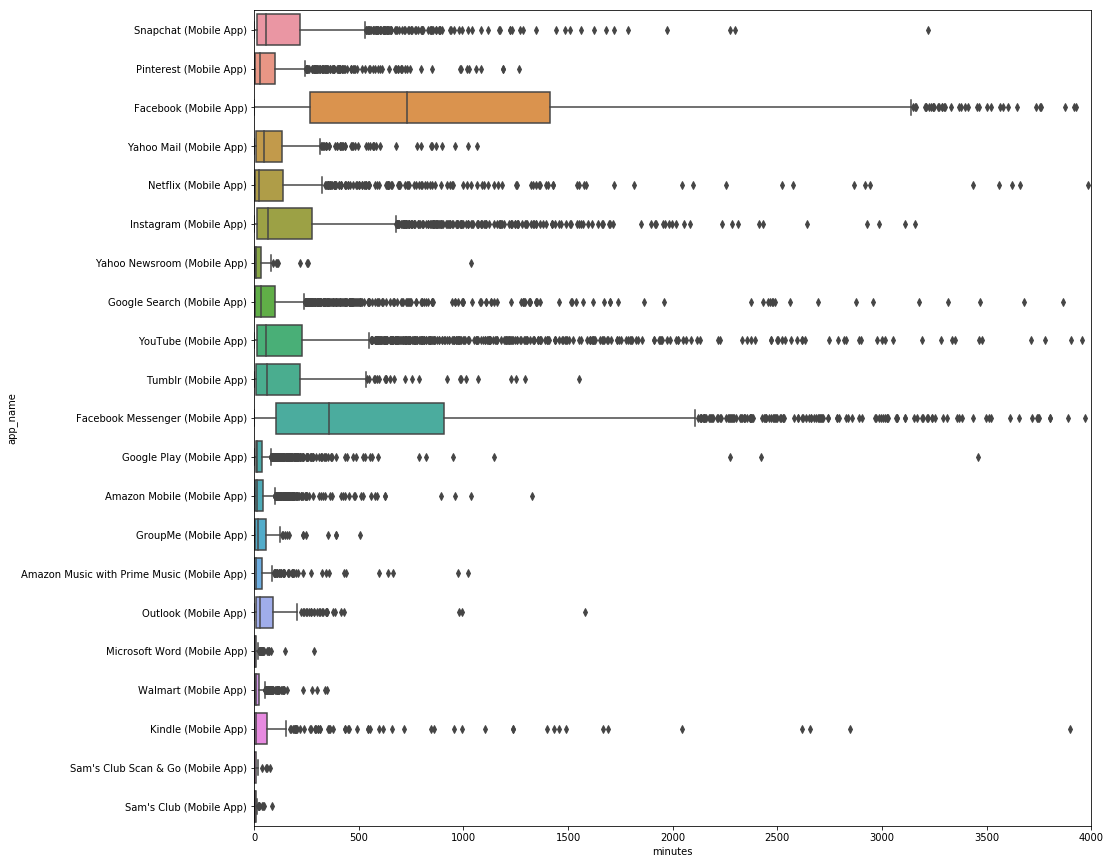

In [8]:
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xlim((0,4000))
act_app_distribution = sns.boxplot(y = activity['app_name'] , x = activity['minutes'], orient="h")

## Aggreated by apps
### Distinct devices amounts, minutes: mean/standard deviation/min/25% quantile/median/75% quantile/max/sum

In [9]:
activity_app_sum = activity.groupby(['app_name'])['minutes'].sum()
activity_app_res = activity.groupby(['app_name'])['minutes'].describe()
activity_app_res['sum'] = activity_app_sum
activity_app_dep = activity_app_res.sort_values(by=['count', 'mean'], ascending = False)
activity_app_dep

,count,mean,std,min,25%,50%,75%,max,sum
app_name,,,,,,,,,
Google Play (Mobile App),2674.0,39.302633,147.474558,0.04,6.3925,15.255,36.1825,5001.98,105095.24
Google Search (Mobile App),2547.0,132.892803,513.990874,0.01,4.3400,31.710,98.9650,13464.93,338477.97
YouTube (Mobile App),2494.0,268.351267,613.928566,0.02,11.0175,55.520,229.2050,8271.59,669268.06
Facebook Messenger (Mobile App),2429.0,655.698057,817.399771,0.01,102.2700,357.050,908.7700,6100.73,1592690.58
Facebook (Mobile App),2357.0,955.965931,875.804482,0.02,266.5500,731.390,1415.3300,6638.60,2253211.70
Instagram (Mobile App),1617.0,235.806487,398.138320,0.02,11.6200,65.410,277.6800,3158.93,381299.09
Amazon Mobile (Mobile App),1582.0,38.317889,83.340304,0.01,2.6850,12.475,40.7175,1325.32,60618.90
Snapchat (Mobile App),1270.0,170.734173,280.180993,0.02,11.4075,55.190,219.6575,3220.09,216832.40
Pinterest (Mobile App),905.0,91.833779,167.350039,0.01,4.2700,27.550,100.1400,1267.59,83109.57


## Apps' median time spend comparison
### Eliminate the impacts of outliers

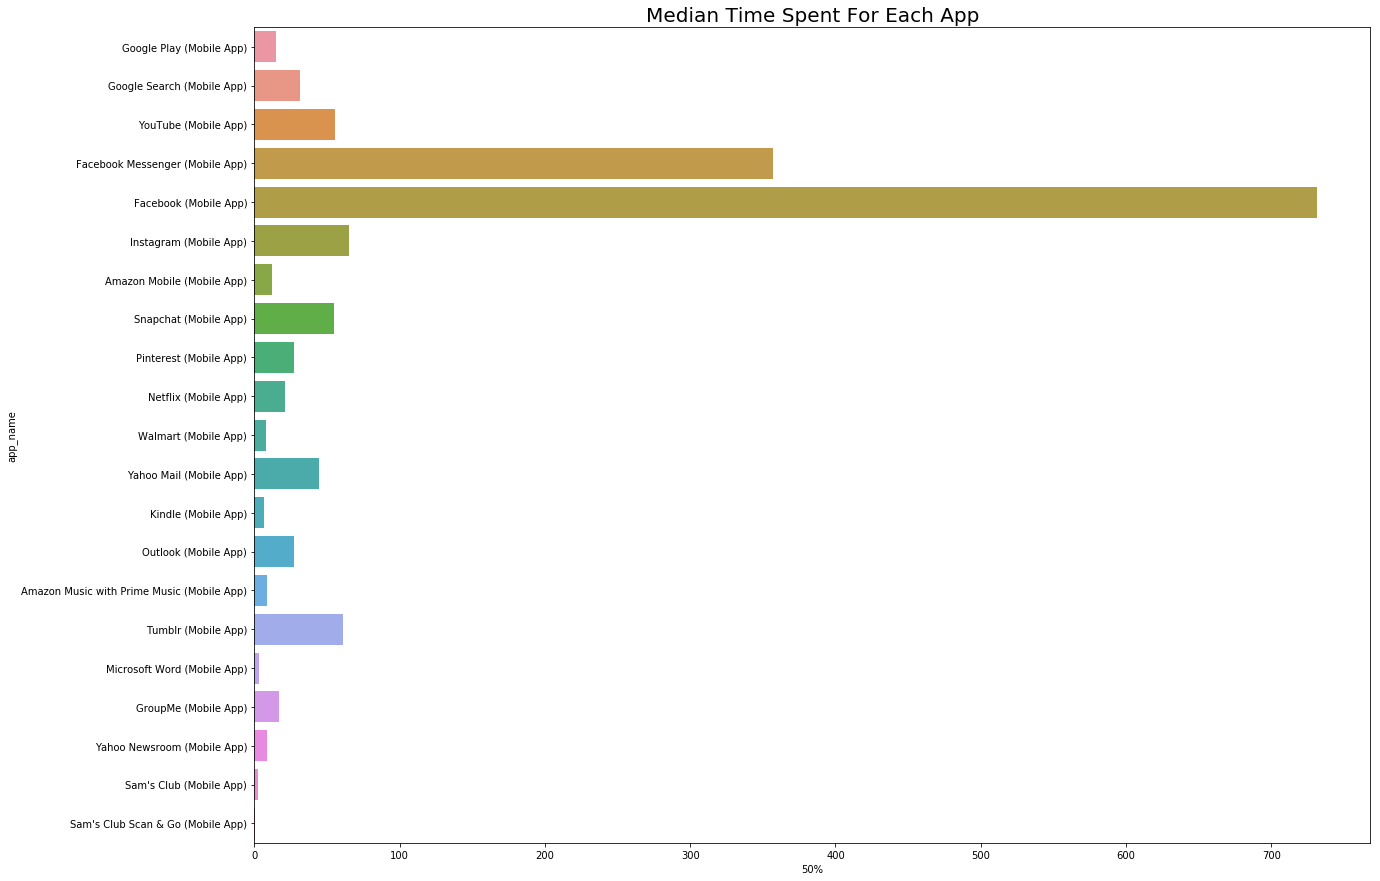

In [10]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
app_mid_time_spend = sns.barplot(activity_app_dep['50%'], activity_app_dep.index, orient='h')
app_mid_time_spend.set_title('Median Time Spent For Each App', fontsize = 20)
app_mid_time_spend

## Remove outliers

In [11]:
# Calculate upper and lower whisker
activity_app_dep['upper_whisker'] = activity_app_dep['75%'] + 1.5 * (activity_app_dep['75%'] - activity_app_dep['25%'])

# The lower whisker should not be negative
lower_whisker_temp = (activity_app_dep['25%'] - 1.5 * (activity_app_dep['75%'] - activity_app_dep['25%'])).values
lower_whisker = np.maximum(lower_whisker_temp, np.zeros(lower_whisker_temp.shape))
activity_app_dep['lower_whisker'] = lower_whisker

activity_app_dep


,count,mean,std,min,25%,50%,75%,max,sum,upper_whisker,lower_whisker
app_name,,,,,,,,,,,
Google Play (Mobile App),2674.0,39.302633,147.474558,0.04,6.3925,15.255,36.1825,5001.98,105095.24,80.86750,0.0
Google Search (Mobile App),2547.0,132.892803,513.990874,0.01,4.3400,31.710,98.9650,13464.93,338477.97,240.90250,0.0
YouTube (Mobile App),2494.0,268.351267,613.928566,0.02,11.0175,55.520,229.2050,8271.59,669268.06,556.48625,0.0
Facebook Messenger (Mobile App),2429.0,655.698057,817.399771,0.01,102.2700,357.050,908.7700,6100.73,1592690.58,2118.52000,0.0
Facebook (Mobile App),2357.0,955.965931,875.804482,0.02,266.5500,731.390,1415.3300,6638.60,2253211.70,3138.50000,0.0
Instagram (Mobile App),1617.0,235.806487,398.138320,0.02,11.6200,65.410,277.6800,3158.93,381299.09,676.77000,0.0
Amazon Mobile (Mobile App),1582.0,38.317889,83.340304,0.01,2.6850,12.475,40.7175,1325.32,60618.90,97.76625,0.0
Snapchat (Mobile App),1270.0,170.734173,280.180993,0.02,11.4075,55.190,219.6575,3220.09,216832.40,532.03250,0.0
Pinterest (Mobile App),905.0,91.833779,167.350039,0.01,4.2700,27.550,100.1400,1267.59,83109.57,243.94500,0.0


In [12]:
upper_whisker_by_device_id = activity_app_dep.loc[activity['app_name']]['upper_whisker']
upper_whisker_by_device_id.values
activity.loc[activity['minutes'] <= upper_whisker_by_device_id.values]
activity.count()

device_id    21692
app_name     21692
minutes      21692
dtype: int64

In [13]:
filtered_activity = activity.loc[activity['minutes'] <= upper_whisker_by_device_id.values]
filtered_activity.count()

device_id    19673
app_name     19673
minutes      19673
dtype: int64

## Count unique device_ids after removing outliers

In [14]:
len(filtered_activity['device_id'].unique())

2771

## Aggreated by apps-Outliers Removed
### Distinct devices amounts, minutes: mean/standard deviation/min/25% quantile/median/75% quantile/max/sum

In [15]:
factivity_app_sum = filtered_activity.groupby(['app_name'])['minutes'].sum()
factivity_app_res = filtered_activity.groupby(['app_name'])['minutes'].describe()
factivity_app_res['sum'] = factivity_app_sum
factivity_app_dep = factivity_app_res
factivity_app_dep

,count,mean,std,min,25%,50%,75%,max,sum
app_name,,,,,,,,,
Amazon Mobile (Mobile App),1428.0,19.507108,22.922189,0.01,2.2500,10.155,28.5800,97.16,27856.15
Amazon Music with Prime Music (Mobile App),243.0,14.325226,20.262179,0.01,0.7550,4.640,20.4950,87.22,3481.03
Facebook (Mobile App),2299.0,881.247482,737.384963,0.02,256.5150,710.640,1355.2150,3136.57,2025987.96
Facebook Messenger (Mobile App),2278.0,498.276997,508.727549,0.01,90.1475,324.625,745.8900,2106.82,1135075.00
Google Play (Mobile App),2407.0,19.394404,18.388195,0.04,5.7050,12.700,27.6200,80.82,46682.33
Google Search (Mobile App),2298.0,47.195692,56.139363,0.01,3.4250,23.780,72.2800,240.36,108455.70
GroupMe (Mobile App),155.0,28.362774,30.760887,0.06,3.7650,14.930,46.5950,124.33,4396.23
Instagram (Mobile App),1444.0,121.659432,156.628181,0.02,8.9775,48.760,184.2700,676.69,175676.22
Kindle (Mobile App),275.0,17.794400,32.133999,0.01,0.3850,2.890,13.7750,152.20,4893.46


## Apps' mean time spend comparison 

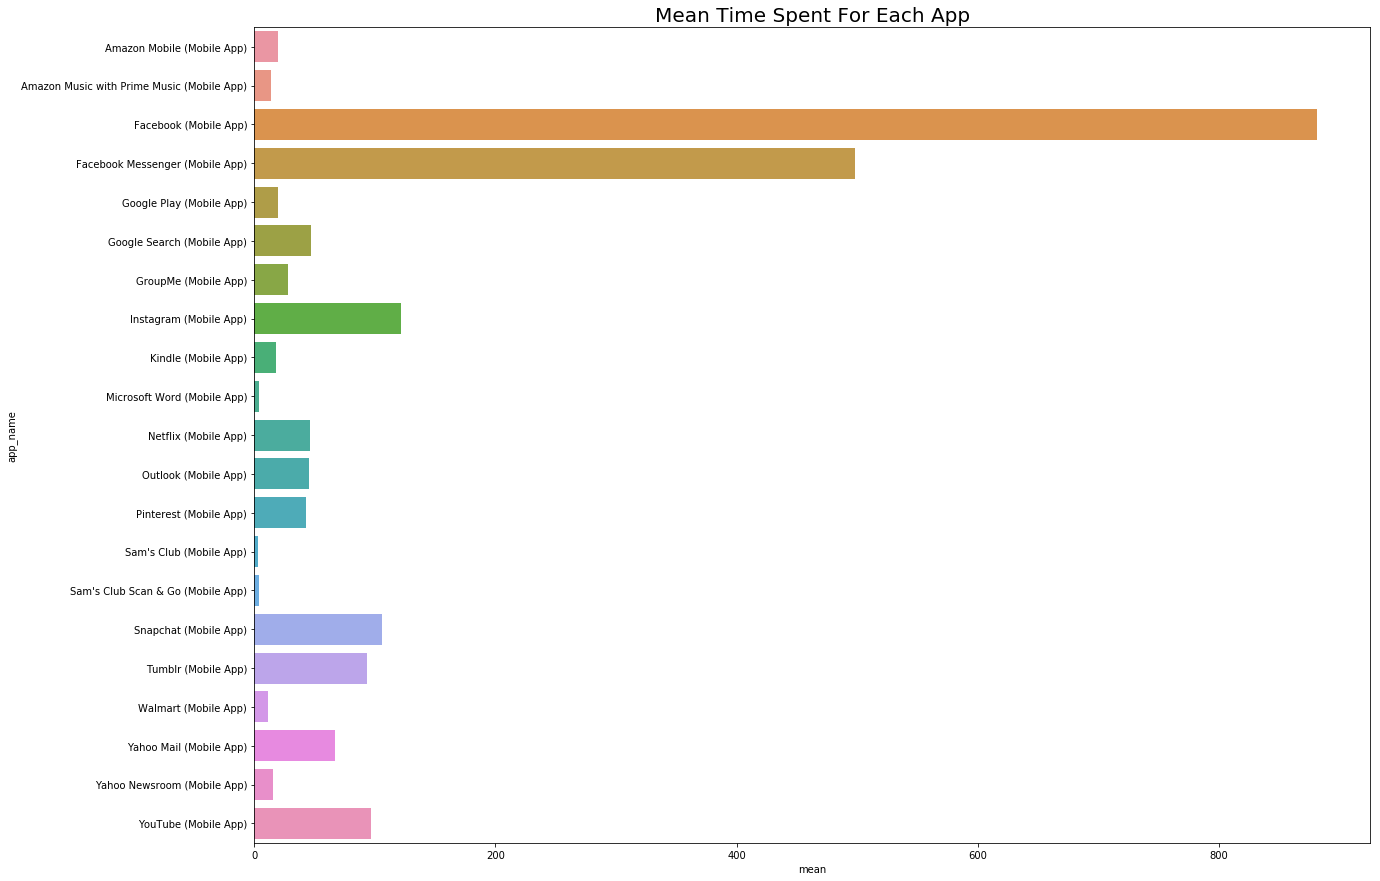

In [16]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
fapp_mean_time_spend = sns.barplot(factivity_app_dep['mean'], factivity_app_dep.index, orient='h')
fapp_mean_time_spend.set_title('Mean Time Spent For Each App', fontsize = 20)
fapp_mean_time_spend

## Apps' distinct devices amounts comparison

In [17]:
factivity_app_uniq = filtered_activity.groupby(['app_name'])['device_id'].nunique()
factivity_app_uniq

app_name
Amazon Mobile (Mobile App)                    1428
Amazon Music with Prime Music (Mobile App)     243
Facebook (Mobile App)                         2299
Facebook Messenger (Mobile App)               2278
Google Play (Mobile App)                      2407
Google Search (Mobile App)                    2298
GroupMe (Mobile App)                           155
Instagram (Mobile App)                        1444
Kindle (Mobile App)                            275
Microsoft Word (Mobile App)                    186
Netflix (Mobile App)                           654
Outlook (Mobile App)                           300
Pinterest (Mobile App)                         805
Sam's Club (Mobile App)                         43
Sam's Club Scan & Go (Mobile App)               39
Snapchat (Mobile App)                         1165
Tumblr (Mobile App)                            187
Walmart (Mobile App)                           650
Yahoo Mail (Mobile App)                        562
Yahoo Newsroom (Mobile

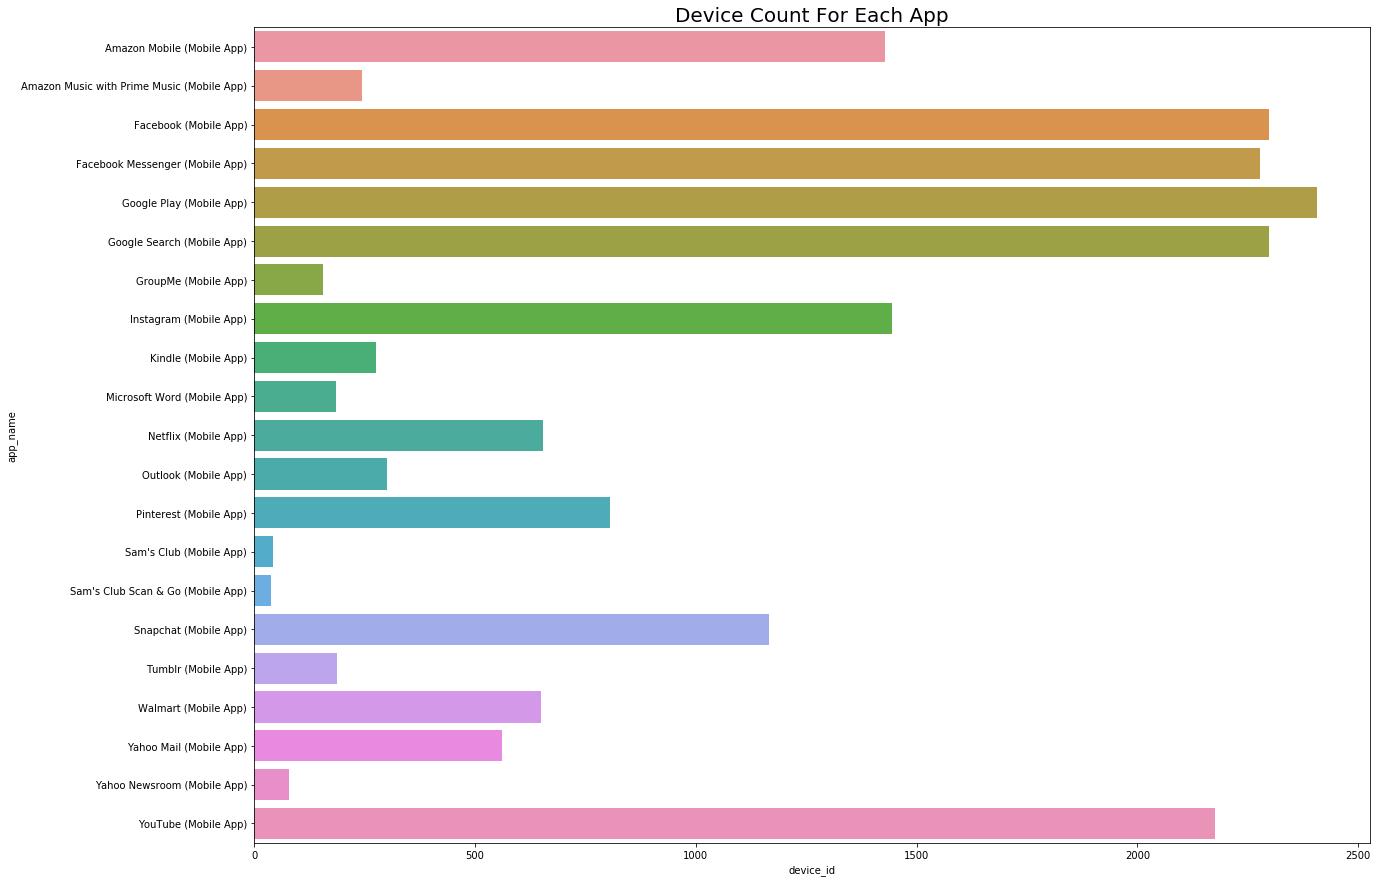

In [18]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
fapp_device_cnt = sns.barplot(factivity_app_uniq, factivity_app_uniq.index, orient='h')
fapp_device_cnt.set_title('Device Count For Each App', fontsize = 20)
fapp_device_cnt

## The user loyalty of each app

### Find the favorite app of each device 

In [19]:
factivity_minutes = filtered_activity.groupby(['device_id', 'app_name']).mean()
idx = factivity_minutes.groupby(['device_id'])['minutes'].transform(max) == factivity_minutes['minutes']
#device_minutes = activity_minutes.groupby(['device_id'])['mean'].max()
# device_minutes = device_minutes.rename(columns={'minutes': 'max'})
device_app_max = factivity_minutes[idx]
device_app_max.head()

,,minutes
device_id,app_name,
1,Facebook (Mobile App),1815.30
2,Facebook Messenger (Mobile App),697.64
3,Facebook Messenger (Mobile App),744.31
4,Facebook (Mobile App),1678.87
5,Facebook (Mobile App),1367.39


### Calculate how many devices consider the given app as their favorite app, and the time spend features of those devices

In [20]:
device_app_max_res = device_app_max.groupby(['app_name'])['minutes'].describe()
device_app_max_res

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
Amazon Mobile (Mobile App),14.0,53.397857,27.634118,6.68,37.6325,57.010,69.6850,93.40
Facebook (Mobile App),1505.0,1183.081801,709.405639,22.48,613.9100,1081.890,1643.4000,3136.57
Facebook Messenger (Mobile App),713.0,861.909243,531.249245,5.15,422.8500,770.540,1238.0300,2106.82
Google Play (Mobile App),56.0,28.383750,20.826737,0.24,10.7875,23.190,42.6925,71.41
Google Search (Mobile App),68.0,96.944853,70.373402,0.02,33.5250,97.740,158.6075,236.46
GroupMe (Mobile App),1.0,104.020000,NaN,104.02,104.0200,104.020,104.0200,104.02
Instagram (Mobile App),110.0,361.454909,171.457160,14.74,232.6200,369.255,499.4450,676.69
Kindle (Mobile App),4.0,47.697500,25.817283,11.85,38.2800,54.015,63.4325,70.91
Netflix (Mobile App),13.0,159.108462,92.448170,2.07,116.3900,191.800,221.5000,269.12


### Loyal devices amount comparison

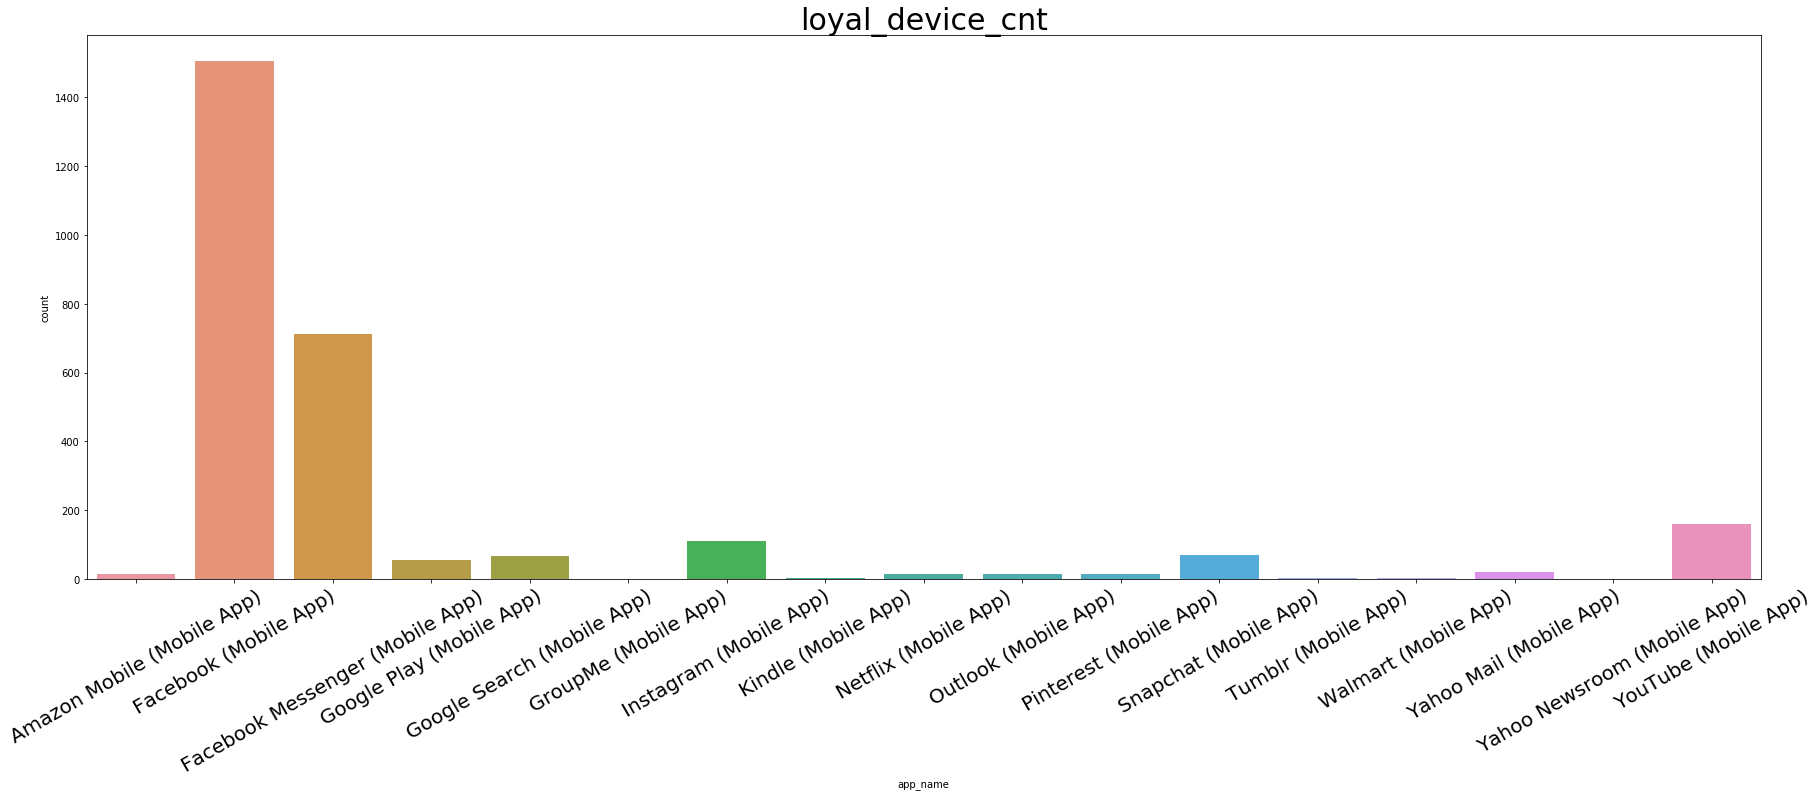

In [21]:
a4_dims = (30, 10)
fig, ax = plt.subplots(figsize=a4_dims)
favourate_app_cnt = sns.barplot(device_app_max_res.index,device_app_max_res['count'])
favourate_app_cnt.set_xticklabels(favourate_app_cnt.get_xticklabels(), rotation=30, fontsize = 20)
favourate_app_cnt.set_title('loyal_device_cnt', fontsize = 30)
favourate_app_cnt

# Which company to cooperate with?

In [22]:
app_publisher

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites
5,Netflix (Mobile App),Netflix Inc.
6,Tumblr (Mobile App),Oath
7,Facebook Messenger (Mobile App),Facebook
8,Kindle (Mobile App),Amazon Sites
9,GroupMe (Mobile App),Microsoft Sites


In [23]:
filtered_activity.head()

,device_id,app_name,minutes
0,1255,Snapchat (Mobile App),7.39
1,873,Pinterest (Mobile App),3.88
2,1919,Facebook (Mobile App),116.34
3,1531,Yahoo Mail (Mobile App),238.27
4,748,Netflix (Mobile App),4.59


In [24]:
pub_app = pd.merge(app_publisher, filtered_activity, how = 'left', on=['app_name'])
pub_app = pub_app[['Publisher', 'app_name', 'device_id', 'minutes']]
pub_app.head()

,Publisher,app_name,device_id,minutes
0,Wal-Mart,Walmart (Mobile App),1565,0.04
1,Wal-Mart,Walmart (Mobile App),1389,8.64
2,Wal-Mart,Walmart (Mobile App),768,13.69
3,Wal-Mart,Walmart (Mobile App),258,6.51
4,Wal-Mart,Walmart (Mobile App),151,15.75


## Aggreated by publisher
### Distinct devices amounts, minutes: mean/standard deviation/min/25% quantile/median/75% quantile/max/sum

In [25]:
pub_app_sum = pub_app.groupby(['Publisher'])['minutes'].sum()
pub_app_res = pub_app.groupby(['Publisher'])['minutes'].describe()
pub_app_res['sum'] = pub_app_sum
pub_app_dep = pub_app_res
pub_app_dep

,count,mean,std,min,25%,50%,75%,max,sum
Publisher,,,,,,,,,
Amazon Sites,1946.0,18.618006,24.187173,0.01,1.5225,8.645,26.0975,152.20,36230.64
Facebook,6021.0,554.183554,631.060413,0.01,62.1300,311.270,838.7700,3136.57,3336739.18
Google Sites,6881.0,53.066349,85.523657,0.01,5.5600,19.930,60.7900,550.60,365149.55
Microsoft Sites,641.0,29.123183,41.757828,0.02,2.2400,10.230,37.6500,206.18,18667.96
Netflix Inc.,654.0,46.405260,72.171936,0.02,1.6975,10.020,58.5725,324.96,30349.04
Oath,828.0,68.360314,85.972768,0.01,5.8400,34.570,102.5850,532.93,56602.34
Pinterest,805.0,43.296484,54.428476,0.01,2.9200,21.430,61.8600,241.08,34853.67
"Snapchat, Inc",1165.0,105.882996,132.260159,0.02,9.3200,46.170,155.9100,531.61,123353.69
Wal-Mart,732.0,10.512350,11.516123,0.01,1.8275,6.145,15.1400,50.14,7695.04


## Publishers' devices amounts comparison 

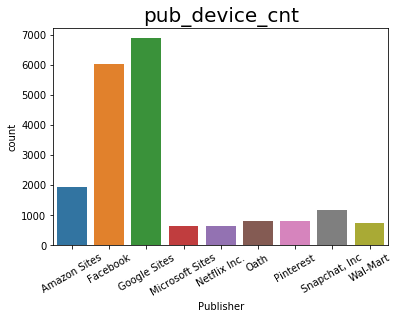

In [26]:
pub_device_cnt = sns.barplot(pub_app_dep.index,pub_app_dep['count'])
pub_device_cnt.set_xticklabels(pub_device_cnt.get_xticklabels(), rotation=30)
pub_device_cnt.set_title('pub_device_cnt', fontsize = 20)
pub_device_cnt

## Publishers' mean time spend comparison

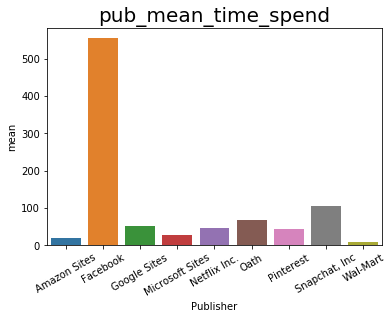

In [27]:
pub_mean_time_spend = sns.barplot(pub_app_dep.index,pub_app_dep['mean'])
pub_mean_time_spend.set_xticklabels(pub_mean_time_spend.get_xticklabels(), rotation=30)
pub_mean_time_spend.set_title('pub_mean_time_spend', fontsize = 20)
pub_mean_time_spend

# Who to target on different apps?

In [28]:
demo_info.head()

,device_id,gender_id
0,1125,2.0
1,1465,1.0
2,940,2.0
3,759,2.0
4,1968,2.0


## Show null values

In [29]:
demo_info.count()

device_id    2774
gender_id    2676
dtype: int64

## Drop null 

In [30]:
demo_info = demo_info.dropna(axis=0, how='any')
demo_info.count()

device_id    2676
gender_id    2676
dtype: int64

## Replace 1, 2 with Male & Female - easy to show

In [31]:
demo_info_rep =demo_info.replace({'gender_id': {1:'Male', 2:'Female'}})
demo_info_rep.head()

,device_id,gender_id
0,1125,Female
1,1465,Male
2,940,Female
3,759,Female
4,1968,Female


## Amount difference between genders 

In [32]:
demo_num = demo_info_rep.groupby(['gender_id'])['device_id'].nunique()
demo_num

gender_id
Female    1657
Male      1019
Name: device_id, dtype: int64

## Describe behaviors basing on genders 

In [33]:
fact_app_demo = pd.merge(filtered_activity, demo_info_rep, how = 'inner', on=['device_id'])
fact_app_demo = fact_app_demo[['app_name', 'device_id', 'gender_id', 'minutes']]
fact_app_demo.head()

,app_name,device_id,gender_id,minutes
0,Snapchat (Mobile App),1255,Female,7.39
1,Pinterest (Mobile App),1255,Female,1.46
2,Instagram (Mobile App),1255,Female,229.40
3,Tumblr (Mobile App),1255,Female,48.89
4,YouTube (Mobile App),1255,Female,18.42


## Aggreated by genders
### Distinct devices amounts, minutes: mean/standard deviation/min/25% quantile/median/75% quantile/max/sum

In [34]:
fact_demo_sum = fact_app_demo.groupby(['gender_id'])['minutes'].sum()
fact_demo_res = fact_app_demo.groupby(['gender_id'])['minutes'].describe()
fact_demo_res['unique_num'] = demo_num
fact_demo_res['avg_product_num'] = fact_demo_res['count'] * 1.0 / fact_demo_res['unique_num']
fact_demo_res['sum'] = fact_demo_sum
fact_demo_dep = fact_demo_res
fact_demo_dep

,count,mean,std,min,25%,50%,75%,max,unique_num,avg_product_num,sum
gender_id,,,,,,,,,,,
Female,11967.0,210.049154,438.834827,0.01,6.650,32.77,159.77,3091.90,1657,7.222088,2513658.23
Male,7019.0,191.958282,396.812137,0.01,6.065,31.44,162.15,3136.57,1019,6.888126,1347355.18


## Gender difference for each app 

In [35]:
fact_app_demo_sum = fact_app_demo.groupby(['app_name','gender_id'])['minutes'].sum()
fact_app_demo_res = fact_app_demo.groupby(['app_name','gender_id'])['minutes'].describe()
fact_app_demo_res['sum'] = fact_app_demo_sum
fact_app_demo_dep = fact_app_demo_res
fact_app_demo_dep

count        mean  \
app_name                                   gender_id                       
Amazon Mobile (Mobile App)                 Female      856.0   21.499825   
                                           Male        521.0   16.735413   
Amazon Music with Prime Music (Mobile App) Female      150.0   14.905467   
                                           Male         86.0   13.482093   
Facebook (Mobile App)                      Female     1387.0  933.996698   
                                           Male        832.0  786.062668   
Facebook Messenger (Mobile App)            Female     1373.0  524.372913   
                                           Male        818.0  457.080306   
Google Play (Mobile App)                   Female     1418.0   20.179803   
                                           Male        907.0   18.319504   
Google Search (Mobile App)                 Female     1365.0   49.643392   
                                           Male        850.0   43.295576   
GroupMe (Mobile App)                       Female       82.0   26.076098   
                                           Male         70.0   31.565286   
Instagram (Mobile App)                     Female      866.0  117.465231   
                                           Male        530.0  125.825377   
Kindle (Mobile App)                        Female      194.0   17.922784   
                                           Male         68.0   17.992206   
Microsoft Word (Mobile App)                Female      108.0    4.343796   
                                           Male         75.0    3.223600   
Netflix (Mobile App)                       Female      391.0   47.671458   
                                           Male        238.0   42.161429   
Outlook (Mobile App)                       Female      169.0   44.660592   
                                           Male        123.0   46.525447   
Pinterest (Mobile App)                     Female      614.0   46.323583   
                                           Male        163.0   29.017178   
Sam's Club (Mobile App)                    Female       29.0    3.055862   
                                           Male         12.0    2.774167   
Sam's Club Scan & Go (Mobile App)          Female       24.0    4.110417   
                                           Male         13.0    4.363077   
Snapchat (Mobile App)                      Female      695.0   93.779540   
                                           Male        429.0  124.924056   
Tumblr (Mobile App)                        Female       87.0   63.732874   
                                           Male         97.0  120.297216   
Walmart (Mobile App)                       Female      478.0   12.071423   
                                           Male        152.0    9.243684   
Yahoo Mail (Mobile App)                    Female      350.0   77.097800   
                                           Male        190.0   47.540526   
Yahoo Newsroom (Mobile App)                Female       39.0   14.156410   
                                           Male         36.0   18.791389   
YouTube (Mobile App)                       Female     1292.0   88.675325   
                                           Male        809.0  109.825847   

                                                             std   min  \
app_name                                   gender_id                     
Amazon Mobile (Mobile App)                 Female      24.107267  0.01   
                                           Male        21.116424  0.02   
Amazon Music with Prime Music (Mobile App) Female      20.965332  0.02   
                                           Male        19.315231  0.01   
Facebook (Mobile App)                      Female     749.444936  0.05   
                                           Male       696.716683  0.02   
Facebook Messenger (Mobile App)            Female     516.155531  0.01   
                                           M

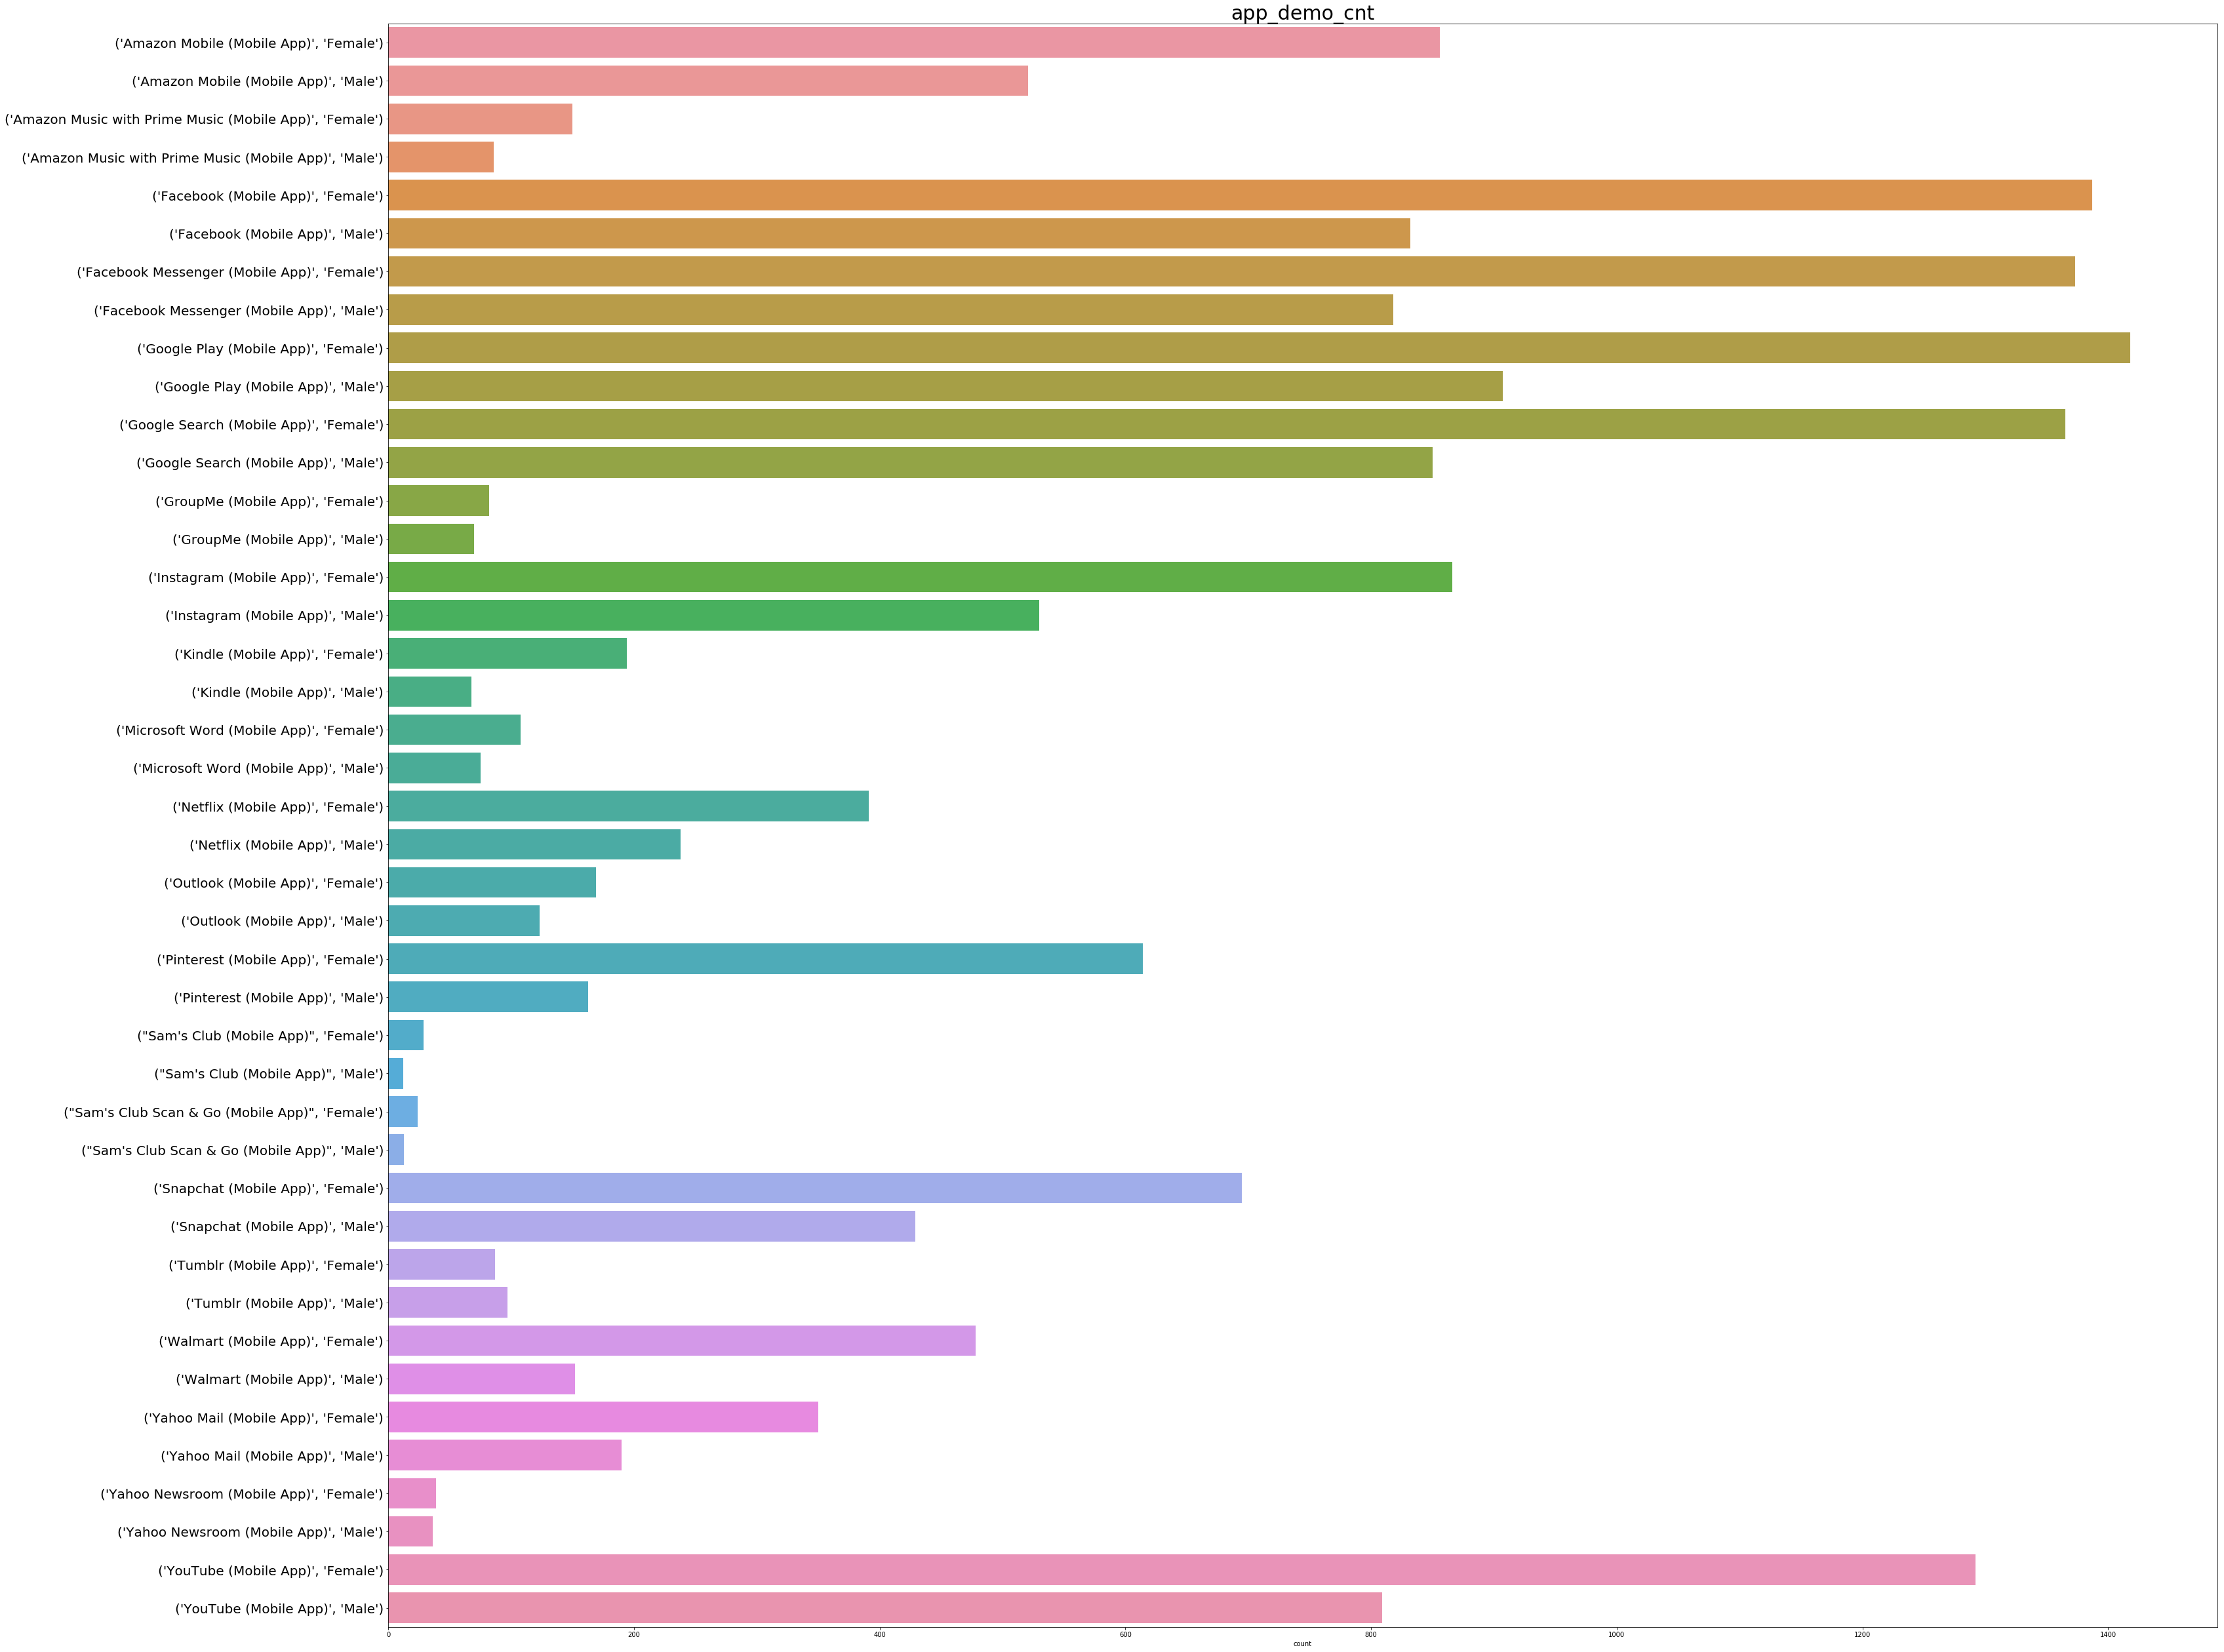

In [36]:
a4_dims = (50, 45)
fig, ax = plt.subplots(figsize=a4_dims)
app_demo_cnt = sns.barplot(fact_app_demo_dep['count'], fact_app_demo_dep.index, orient='h')
app_demo_cnt.set_yticklabels(app_demo_cnt.get_yticklabels(), fontsize = 20)
app_demo_cnt.set_title('app_demo_cnt', fontsize = 30)
app_demo_cnt

## Males & Females' favorite apps ranking - rank by mean time spend

In [37]:
fact_demo_app_sum = fact_app_demo.groupby(['gender_id', 'app_name'])['minutes'].sum()
fact_demo_app_res = fact_app_demo.groupby(['gender_id', 'app_name'])['minutes'].describe()
fact_demo_app_res['sum'] = fact_demo_app_sum
fact_demo_app_dep = fact_demo_app_res
fact_demo_app_favor = fact_demo_app_dep.sort_values(by=['gender_id','mean'])
fact_demo_app_favor

count        mean  \
gender_id app_name                                                         
Female    Sam's Club (Mobile App)                       29.0    3.055862   
          Sam's Club Scan & Go (Mobile App)             24.0    4.110417   
          Microsoft Word (Mobile App)                  108.0    4.343796   
          Walmart (Mobile App)                         478.0   12.071423   
          Yahoo Newsroom (Mobile App)                   39.0   14.156410   
          Amazon Music with Prime Music (Mobile App)   150.0   14.905467   
          Kindle (Mobile App)                          194.0   17.922784   
          Google Play (Mobile App)                    1418.0   20.179803   
          Amazon Mobile (Mobile App)                   856.0   21.499825   
          GroupMe (Mobile App)                          82.0   26.076098   
          Outlook (Mobile App)                         169.0   44.660592   
          Pinterest (Mobile App)                       614.0   46.323583   
          Netflix (Mobile App)                         391.0   47.671458   
          Google Search (Mobile App)                  1365.0   49.643392   
          Tumblr (Mobile App)                           87.0   63.732874   
          Yahoo Mail (Mobile App)                      350.0   77.097800   
          YouTube (Mobile App)                        1292.0   88.675325   
          Snapchat (Mobile App)                        695.0   93.779540   
          Instagram (Mobile App)                       866.0  117.465231   
          Facebook Messenger (Mobile App)             1373.0  524.372913   
          Facebook (Mobile App)                       1387.0  933.996698   
Male      Sam's Club (Mobile App)                       12.0    2.774167   
          Microsoft Word (Mobile App)                   75.0    3.223600   
          Sam's Club Scan & Go (Mobile App)             13.0    4.363077   
          Walmart (Mobile App)                         152.0    9.243684   
          Amazon Music with Prime Music (Mobile App)    86.0   13.482093   
          Amazon Mobile (Mobile App)                   521.0   16.735413   
          Kindle (Mobile App)                           68.0   17.992206   
          Google Play (Mobile App)                     907.0   18.319504   
          Yahoo Newsroom (Mobile App)                   36.0   18.791389   
          Pinterest (Mobile App)                       163.0   29.017178   
          GroupMe (Mobile App)                          70.0   31.565286   
          Netflix (Mobile App)                         238.0   42.161429   
          Google Search (Mobile App)                   850.0   43.295576   
          Outlook (Mobile App)                         123.0   46.525447   
          Yahoo Mail (Mobile App)                      190.0   47.540526   
          YouTube (Mobile App)                         809.0  109.825847   
          Tumblr (Mobile App)                           97.0  120.297216   
          Snapchat (Mobile App)                        429.0  124.924056   
          Instagram (Mobile App)                       530.0  125.825377   
          Facebook Messenger (Mobile App)              818.0  457.080306   
          Facebook (Mobile App)                        832.0  786.062668   

                                                             std   min  \
gender_id app_name                                                       
Female    Sam's Club (Mobile App)                       3.500364  0.09   
          Sam's Club Scan & Go (Mobile App)             5.812276  0.04   
          Microsoft Word (Mobile App)                   4.535854  0.03   
          Walmart (Mobile App)                         12.368410  0.02   
          Yahoo Newsroom (Mobile App)                  16.303084  0.03   
          Amazon Music with Prime Music (Mobile App)   20.965332  0.02   
          Kindle (Mobile App)                          32.973855  0.01   
          Google Play (Mobile App)          

## Males & Females' favorite apps ranking - rank by the amount of devices

In [38]:
fact_demo_app_volume = fact_demo_app_dep.sort_values(by=['gender_id','count'])
fact_demo_app_volume

count        mean  \
gender_id app_name                                                         
Female    Sam's Club Scan & Go (Mobile App)             24.0    4.110417   
          Sam's Club (Mobile App)                       29.0    3.055862   
          Yahoo Newsroom (Mobile App)                   39.0   14.156410   
          GroupMe (Mobile App)                          82.0   26.076098   
          Tumblr (Mobile App)                           87.0   63.732874   
          Microsoft Word (Mobile App)                  108.0    4.343796   
          Amazon Music with Prime Music (Mobile App)   150.0   14.905467   
          Outlook (Mobile App)                         169.0   44.660592   
          Kindle (Mobile App)                          194.0   17.922784   
          Yahoo Mail (Mobile App)                      350.0   77.097800   
          Netflix (Mobile App)                         391.0   47.671458   
          Walmart (Mobile App)                         478.0   12.071423   
          Pinterest (Mobile App)                       614.0   46.323583   
          Snapchat (Mobile App)                        695.0   93.779540   
          Amazon Mobile (Mobile App)                   856.0   21.499825   
          Instagram (Mobile App)                       866.0  117.465231   
          YouTube (Mobile App)                        1292.0   88.675325   
          Google Search (Mobile App)                  1365.0   49.643392   
          Facebook Messenger (Mobile App)             1373.0  524.372913   
          Facebook (Mobile App)                       1387.0  933.996698   
          Google Play (Mobile App)                    1418.0   20.179803   
Male      Sam's Club (Mobile App)                       12.0    2.774167   
          Sam's Club Scan & Go (Mobile App)             13.0    4.363077   
          Yahoo Newsroom (Mobile App)                   36.0   18.791389   
          Kindle (Mobile App)                           68.0   17.992206   
          GroupMe (Mobile App)                          70.0   31.565286   
          Microsoft Word (Mobile App)                   75.0    3.223600   
          Amazon Music with Prime Music (Mobile App)    86.0   13.482093   
          Tumblr (Mobile App)                           97.0  120.297216   
          Outlook (Mobile App)                         123.0   46.525447   
          Walmart (Mobile App)                         152.0    9.243684   
          Pinterest (Mobile App)                       163.0   29.017178   
          Yahoo Mail (Mobile App)                      190.0   47.540526   
          Netflix (Mobile App)                         238.0   42.161429   
          Snapchat (Mobile App)                        429.0  124.924056   
          Amazon Mobile (Mobile App)                   521.0   16.735413   
          Instagram (Mobile App)                       530.0  125.825377   
          YouTube (Mobile App)                         809.0  109.825847   
          Facebook Messenger (Mobile App)              818.0  457.080306   
          Facebook (Mobile App)                        832.0  786.062668   
          Google Search (Mobile App)                   850.0   43.295576   
          Google Play (Mobile App)                     907.0   18.319504   

                                                             std   min  \
gender_id app_name                                                       
Female    Sam's Club Scan & Go (Mobile App)             5.812276  0.04   
          Sam's Club (Mobile App)                       3.500364  0.09   
          Yahoo Newsroom (Mobile App)                  16.303084  0.03   
          GroupMe (Mobile App)                         29.828592  0.26   
          Tumblr (Mobile App)                         100.497123  0.02   
          Microsoft Word (Mobile App)                   4.535854  0.03   
          Amazon Music with Prime Music (Mobile App)   20.965332  0.02   
          Outlook (Mobile App)              

# Concerns about data quality 

## add_activity given

In [39]:
add_activity

,app_name,total_devices,minutes
0,Kindle (Mobile App),379,43521.39
1,Google Play (Mobile App),3025,104154.07
2,Facebook (Mobile App),2672,2141691.64
3,Walmart (Mobile App),792,16149.21
4,Facebook Messenger (Mobile App),2722,1792877.26
5,Amazon Mobile (Mobile App),1677,69338.73
6,Sam's Club (Mobile App),67,535.57
7,Amazon Music with Prime Music (Mobile App),309,7956.76
8,Netflix (Mobile App),783,157384.61
9,Pinterest (Mobile App),995,72624.25


In [40]:
add_activity['mean_given'] = add_activity['minutes'] * 1.0 / add_activity['total_devices']
add_activity

,app_name,total_devices,minutes,mean_given
0,Kindle (Mobile App),379,43521.39,114.832164
1,Google Play (Mobile App),3025,104154.07,34.431098
2,Facebook (Mobile App),2672,2141691.64,801.531302
3,Walmart (Mobile App),792,16149.21,20.390417
4,Facebook Messenger (Mobile App),2722,1792877.26,658.661741
5,Amazon Mobile (Mobile App),1677,69338.73,41.346887
6,Sam's Club (Mobile App),67,535.57,7.993582
7,Amazon Music with Prime Music (Mobile App),309,7956.76,25.750032
8,Netflix (Mobile App),783,157384.61,201.002056
9,Pinterest (Mobile App),995,72624.25,72.989196


## mean calculated 

In [41]:
app_act_calculated = activity_app_dep[['mean']]
app_act_calculated.columns.values
app_act_calculated.columns = ['mean_cal']
app_act_calculated

,mean_cal
app_name,
Google Play (Mobile App),39.302633
Google Search (Mobile App),132.892803
YouTube (Mobile App),268.351267
Facebook Messenger (Mobile App),655.698057
Facebook (Mobile App),955.965931
Instagram (Mobile App),235.806487
Amazon Mobile (Mobile App),38.317889
Snapchat (Mobile App),170.734173
Pinterest (Mobile App),91.833779


## Diff between two datasets 

In [42]:
app_diff = pd.merge(add_activity, app_act_calculated, how = 'outer', on=['app_name'])
app_diff['mean_avg'] = (app_diff['mean_given'] + app_diff['mean_cal']) * 1.0 / 2
app_diff['mean_diff'] = abs(app_diff['mean_given'] - app_diff['mean_cal'])
app_diff['ratio'] = app_diff['mean_diff'] * 1.0 / app_diff['mean_avg']
app_diff = app_diff[['app_name', 'mean_given', 'mean_cal', 'mean_avg', 'mean_diff', 'ratio']]
app_diff

,app_name,mean_given,mean_cal,mean_avg,mean_diff,ratio
0,Kindle (Mobile App),114.832164,146.126292,130.479228,31.294128,0.239840
1,Google Play (Mobile App),34.431098,39.302633,36.866865,4.871535,0.132139
2,Facebook (Mobile App),801.531302,955.965931,878.748617,154.434629,0.175744
3,Walmart (Mobile App),20.390417,20.102618,20.246517,0.287799,0.014215
4,Facebook Messenger (Mobile App),658.661741,655.698057,657.179899,2.963685,0.004510
5,Amazon Mobile (Mobile App),41.346887,38.317889,39.832388,3.028999,0.076044
6,Sam's Club (Mobile App),7.993582,8.440385,8.216983,0.446803,0.054375
7,Amazon Music with Prime Music (Mobile App),25.750032,49.510209,37.630121,23.760177,0.631414
8,Netflix (Mobile App),201.002056,217.953510,209.477783,16.951453,0.080922
9,Pinterest (Mobile App),72.989196,91.833779,82.411487,18.844583,0.228665
